<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
# Читаем датасет из csv файла
df_source = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
df = df_source.copy()

# Ответ на вопрос 2.1
df.shape

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
display(df.head(5))
display(df.tail(5))
print(df['Опыт работы'].unique().shape[0])

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


44414


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
df.isnull().sum()

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [6]:
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:
# Разбиваем строку на два признака по разделительному слову  ' образование'.
education_cat = df["Образование и ВУЗ"].str.split(" образование", expand=True)

# Создаем новый признак в изучаемом датасете.
df["Образование"] = education_cat[0]

# Проверяем соответствие полученным категориям условию.
print(df["Образование"].unique())

# Удаляем лишний признак.
df = df.drop("Образование и ВУЗ", axis=1)

# Отвечам на вопрос о том какое количество соискателей имеет среднее образование.
df["Образование"].value_counts()


['Неоконченное высшее' 'Высшее' 'Среднее специальное' 'Среднее']


Высшее                 33863
Среднее специальное     5765
Неоконченное высшее     4557
Среднее                  559
Name: Образование, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [8]:
# Разбиваем строку на три признака по разделителю ' . '.
gender_age = df["Пол, возраст"].str.split(" . ", expand=True)

# Создаем новый признак Пол в изучаемом датасете.
df["Пол"] = gender_age[0].str[0:1]

# Создаем новый признак Пол в изучаемом датасете.
df["Возраст"] = gender_age[1].apply(lambda x: int(re.findall(r"[0-9]+", x)[0]))

# Удаляем отработанный столбец из таблицы
df = df.drop("Пол, возраст", axis=1)

# Ответ на вопрос 3.2. Сколько процентов женских резюме представлено в данных.
display(df["Пол"].value_counts(normalize=True).round(4) * 100)

# Ответ на вопрос 3.3 Чему равен средний возраст соискателей.
display(df["Возраст"].mean().round(1))


М    80.93
Ж    19.07
Name: Пол, dtype: float64

32.2

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [9]:
# Избавимся от лишней информации в строке
df["Опыт работы"] = df["Опыт работы"].str.replace(f"{'  '}.*", "", regex=True)

# Напишем функцию, которая учитывает поставленные условия.
def prep_func(row):
    """
    Функция проверяет значение, переданное в переменной 'row' на соответствие
    критериям (не является явным пропуском - NaN, а равно и скрытым пропуском -
    'Не указано'), производит вычленение числовых значений и производит вычисления
    возраста соискателя в месяцах исходя из того что первая число в строке -
    количество лет, а вторя - количество месяцев.

    Args:
        row (str): Строка содержащая исходные данные

    Returns:
        NaN: Пустое значение np.nan, при соблюдении условий
        int: Вычисленное число при наличии данных для вычислений
    """
    if pd.isna(row):  # Проверяем если строка уже не содержит значение NaN
        return np.nan
    elif row == "Не указано":  # Проверяем если строка уже не содержит скрытый пропуск.
        return np.nan
    else:  # Основная функция
        years = re.search(r"\d+(?=\b(?: год| года| лет)\b)", row)
        months = re.search(r"\d+(?=\b(?: месяц| месяца| месяцев)\b)", row)

        if not months:
            return int(years.group(0)) * 12
        elif not years:
            return int(months.group(0))
        else:
            return int(years.group(0)) * 12 + int(months.group(0))


# Вводим новый признак в таблицу
df["Опыт работы (месяц)"] = df["Опыт работы"].apply(prep_func)

# Удаляем отработанный столбец
df = df.drop("Опыт работы", axis=1)

# Ответ на вопрос 3.3
print(df["Опыт работы (месяц)"].median())


100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [10]:
# Напишем функцию которая вычленяет город из строки
# и распределяет его по категориям.
def extract_city(row):
    """
    Функция принимает значения строки, вычленяет из нее название города
    и соотносит его к установленным категориям.

    Args:
        row (str): строка для анализа

    Returns:
        str: определенная категория
    """
    # Список городов-миллионников
    million_cities = [
        "Новосибирск",
        "Екатеринбург",
        "Нижний Новгород",
        "Казань",
        "Челябинск",
        "Омск",
        "Самара",
        "Ростов-на-Дону",
        "Уфа",
        "Красноярск",
        "Пермь",
        "Воронеж",
        "Волгоград",
    ]

    # Список основных городов-категорий
    primary_cities = ["Москва", "Санкт-Петербург"]
    
    # Разделяем строку и берем первый элемент
    city = row.split(" , ")[0]

    # Основная логика функции
    if city in primary_cities:
        return city
    elif city in million_cities:
        return "город-миллионник"
    else:
        return "другие"


# Создаем новый признак в данных
df["Город"] = df["Город, переезд, командировки"].apply(extract_city)

# Проверяем верно ли произведена операция
print(df["Город"].unique())


# Напишем функцию которая вычленяет готовность к переезду
def extract_move(row):
    """
    Функция извлекающая признак из строки на основе отсутствия 
    искомого сочетания в строке.
    функция возвращает True если в строке не выражена явно неготовность к
    переезду.

    Args:
        row (str): Строка для анализа.

    Returns:
        bool: True если в строке не выражена неготовность к переезду.
    """
    if ('не готов к переезду' in row) or \
        ('не готова к переезду' in row):
            return False
    else:
        return True
            


# И готовность к командировкам. Функция аналогична с добавлением условия проверки
# есть ли вообще в строке слово 'командировка'
def extract_trip(row):
    if ('командировка' in row):
        if ('не готов к командировкам' in row) or \
            ('не готова к командировкам' in row):
                return False
        else:
            return True
    else:
        return False

# Добавим новые признаки в таблицу
df["Готовность к переезду"] = df["Город, переезд, командировки"].apply(
    extract_move
)
df["Готовность к командировкам"] = df["Город, переезд, командировки"].apply(
    extract_trip
)

# И технический признак для ответа на вопрос 3.4
move_trip = df["Готовность к переезду"] & df["Готовность к командировкам"]

# Удаляем отработанный признак
df = df.drop("Город, переезд, командировки", axis=1)

# Ответ на вопрос 3.4
print(df["Город"].value_counts(normalize=True).round(2) * 100)
print(move_trip.value_counts(normalize=True).round(2) * 100)


['другие' 'Москва' 'город-миллионник' 'Санкт-Петербург']
Москва              37.0
другие              35.0
город-миллионник    16.0
Санкт-Петербург     11.0
Name: Город, dtype: float64
False    68.0
True     32.0
dtype: float64


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>

Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [11]:
# Напишем функцию которая проверяет наличие в каждой строке значений
# из эталонного списка. Функция возвращает список списков, булевых значений.
def job_type(row):
    """
    Проверка содержания искомых значений в строке.
    Функция принимает на вход строку, разделяет ее на элементы
    и проверяет наличие каждого из элементов эталонного списка
    на присутствие в проверяемом списке.
    Возвращает список булевых значений.

    Args:
        row (str): проверяемая строка

    Returns:
        lst: Список булевых значений по итогам проверки.
    """
    types_list = [
        "полная занятость",
        "частичная занятость",
        "проектная работа",
        "волонтерство",
        "стажировка",
    ]
    row_split = row.split(", ")
    result_list = []
    for value in types_list:
        result_list.append(value in row_split)
    return result_list


# Формируем датафрейм из результатов проверки категорий занятости.
job_data = pd.DataFrame(
    df["Занятость"].apply(job_type).to_list(),
    columns=[
        "полная занятость",
        "частичная занятость",
        "проектная работа",
        "волонтерство",
        "стажировка",
    ],
)


# Напишем аналогичную функцию по проверке признака 'График'.
def schedule_type(row):
    types_list = [
        "полный день",
        "сменный график",
        "гибкий график",
        "удалённая работа",
        "вахтовый метод",
    ]
    row_split = row.split(", ")
    result_list = []
    for value in types_list:
        result_list.append(value in row_split)
    return result_list


# Аналогично - формируем отдельный датафрейм.
schedule_data = pd.DataFrame(
    df["График"].apply(schedule_type).to_list(),
    columns=[
        "полный день",
        "сменный график",
        "гибкий график",
        "удалённая работа",
        "вахтовый метод",
    ],
)


# Объединяем полученные датафреймы с исходным.
df = pd.concat([df, job_data, schedule_data], axis=1)

# Удаляем отработанные признаки
df = df.drop(["График", "Занятость"], axis=1)

# Ответ на вопрос 3.5
# Проектная + волонтерство
proj_vol = df["проектная работа"] & df["волонтерство"]
display(proj_vol.value_counts())

# Вахтовый + Гибкий
vah_gib = df["вахтовый метод"] & df["гибкий график"]
display(vah_gib.value_counts())


False    44308
True       436
dtype: int64

False    42433
True      2311
dtype: int64

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [12]:
# Читаем базу данных с курсами валют
df_cur = pd.read_csv("data/ExchangeRates.csv")

# Удаляем не интересующие признаки
df_cur = df_cur.drop(["per", "time", "vol"], axis=1)

# Приводим время и дату к формату datetime
df["Обновление резюме"] = pd.to_datetime(
    df["Обновление резюме"], format="%d.%m.%Y %H:%M"
).dt.normalize()

df_cur["date"] = pd.to_datetime(df_cur["date"], format="%d/%m/%y")

# Создадим словарь для замены значений валюты по формату ISO
rep_dict = {
   'руб.':'RUB'
  ,'KZT':'KZT' 
  ,'USD':'USD'
  ,'бел.руб.':'BYN'
  ,'EUR':'EUR'
  ,'грн.':'UAH'
  ,'сум':'UZS'
  ,'KGS':'KGS'
  ,'AZN':'AZN'
}

# Создаем временный датафрейм с которым будем работать. 
# Первое - разделить строку ЗП.
# Отделяем числовую часть от обозначения валюты
df_temp = pd.DataFrame(
    df["ЗП"].str.split(" ").to_list(), 
    columns=["value", "currency"]
    )

# Заменяем значения валюты в соответствии со словарем замен.
# Приводим числовую часть к формату int64
df_temp["currency"] = df_temp["currency"].replace(rep_dict, regex=False)
df_temp["value"] = df_temp["value"].astype("int64")

# Подгружаем дату на которую будем проводить приведение 
# курса валюты из основного датафрейма
df_temp = pd.concat([df_temp, df["Обновление резюме"]], axis=1)

# Объединяем временный датафрейм с данными о курсах валют на искомую дату.
df_temp = pd.merge(
    df_temp,
    df_cur,
    how="left",
    left_on=["currency", "Обновление резюме"],
    right_on=["currency", "date"],
)


# Определяем функцию которую будем применять для формирования 
# искомого признака 'ЗП руб.'
def rub_sal(row):
    if row["currency"] == "RUB":
        return row["value"]
    else:
        return row["value"] * row["close"] / row["proportion"]


# Применяем функцию
df_temp["ЗП руб."] = df_temp.apply(lambda x: rub_sal(x), axis=1).round(2)


# Ответ на вопрос 3.6.
display(f"Медианная зарплата соискателей: {df_temp['ЗП руб.'].median()}")

# Объединяем полученный признак с основным датафреймом.
# Удаляем признак ЗП
df = pd.concat([df, df_temp["ЗП руб."]], axis=1)
df = df.drop("ЗП", axis=1)

# Сверяем результат с условиями
df.info()


'Медианная зарплата соискателей: 59019.0'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44744 non-null  object        
 1   Последнее/нынешнее место работы  44743 non-null  object        
 2   Последняя/нынешняя должность     44742 non-null  object        
 3   Обновление резюме                44744 non-null  datetime64[ns]
 4   Авто                             44744 non-null  object        
 5   Образование                      44744 non-null  object        
 6   Пол                              44744 non-null  object        
 7   Возраст                          44744 non-null  int64         
 8   Опыт работы (месяц)              44574 non-null  float64       
 9   Город                            44744 non-null  object        
 10  Готовность к переезду            44744 non-null  bool     

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

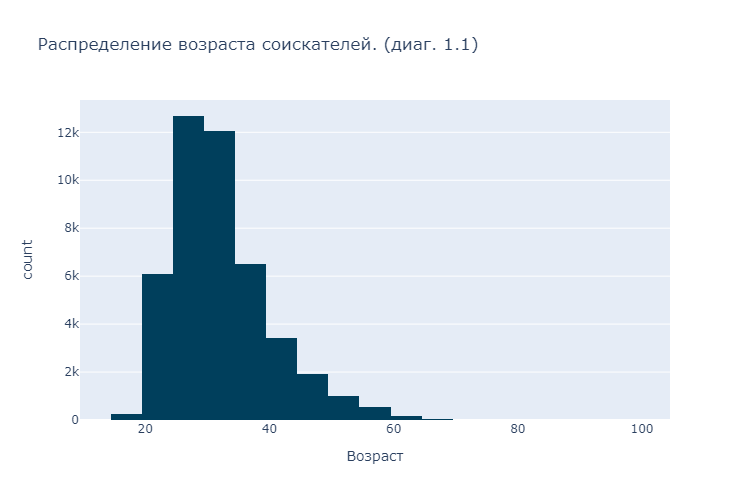

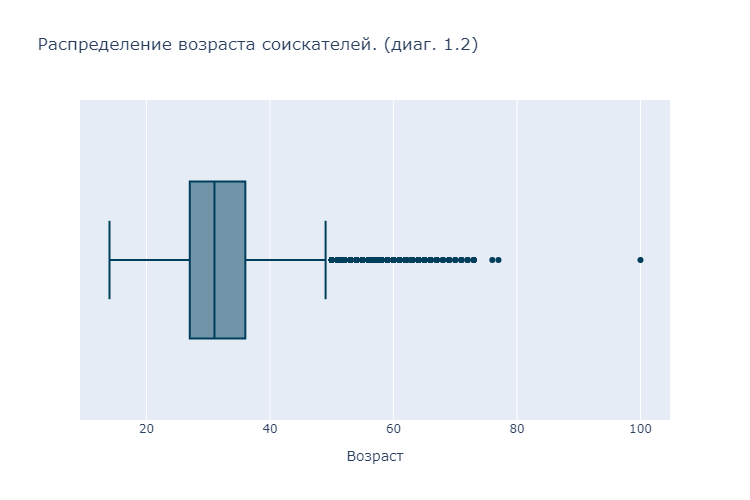

Модальное значение признака 'Возраст' равно     30 лет.


In [13]:
# Строим гистограмму признака
hist = px.histogram(
    data_frame=df,
    x="Возраст",
    width=750,
    height=500,
    nbins=20,
    title="Распределение возраста соискателей. (диаг. 1.1)",
    color_discrete_sequence=[
        "#003f5c", 
        "#58508d", 
        "#bc5090", 
        "#ff6361", 
        "#ffa600"
        ],
)


# Строим коробчатую диаграмму признака
box = px.box(
    data_frame=df,
    x="Возраст",
    width=750,
    height=500,
    title="Распределение возраста соискателей. (диаг. 1.2)",
    color_discrete_sequence=[
        "#003f5c", 
        "#58508d", 
        "#bc5090", 
        "#ff6361", 
        "#ffa600"
        ],
)

# Выводим графики
hist.show('png')
box.show('png')

# Ответ на вопрос 4.1
print(f"Модальное значение признака 'Возраст' равно \
    {df['Возраст'].mode()[0]} лет.")


### Описание Графики [тут](graphs/01_1.png) и [тут](graphs/01_2.png)
* Модальное значение признака 'Возраст' равно 30 лет.
* Большинство соискателей из представленного датафрейма находятся в возрасте от 20 до 40 лет. Минимальный возраст соискателя - 14 лет (что обусловлено законодательным запретом на наемный труд для лиц младше 14 лет). Максимальный возраст соискателя составляет 100 лет. Медианный возраст составляет 31 год, половина соискателей находятся в возрасте от 27 до 36 лет.
* Значение возраста соискателя равное 100 лет является вероятным выбросом (такое значение одно и ближайшее значение до него равно 77). Это некий frontend-разработчик фрилансер со средним специальным образованием из Санкт-Петербурга, с опытом работы в 30 месяцев (2,5 года), готовый к командировкам. Определенно выброс.
* Распределение ассиметричное, напоминает логнормальное.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

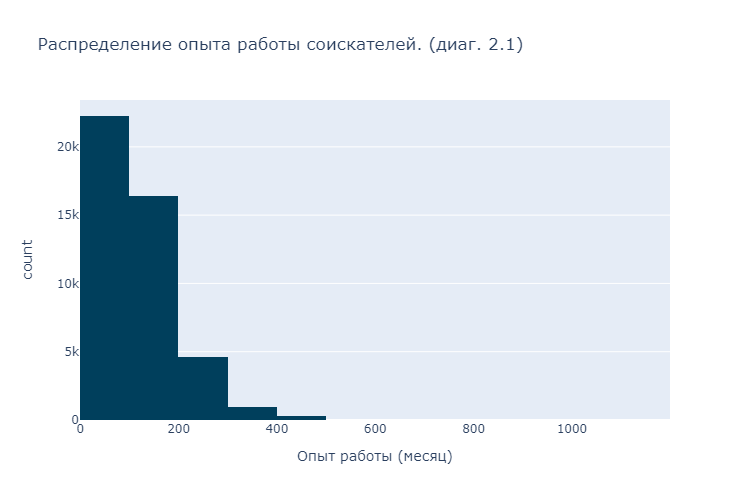

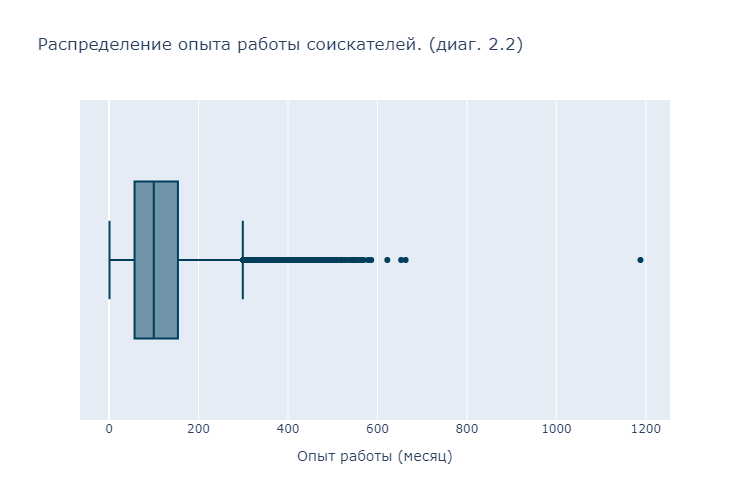

Максимальное значение признака 'Опыт работы (месяц)' равно         1188.0 месяцев. 
 Мода распределения равна 81.0


In [15]:
# Строим гистограмму признака
hist = px.histogram(
    data_frame=df,
    x="Опыт работы (месяц)",
    width=750,
    height=500,
    nbins=20,
    title="Распределение опыта работы соискателей. (диаг. 2.1)",
    color_discrete_sequence=[
        "#003f5c", 
        "#58508d", 
        "#bc5090", 
        "#ff6361", 
        "#ffa600"
        ],
)


# Строим коробчатую диаграмму признака
box = px.box(
    data_frame=df,
    x="Опыт работы (месяц)",
    width=750,
    height=500,
    title="Распределение опыта работы соискателей. (диаг. 2.2)",
    color_discrete_sequence=[
        "#003f5c", 
        "#58508d", 
        "#bc5090", 
        "#ff6361", 
        "#ffa600"
        ],
)

# Выводим графики
hist.show('png')
box.show('png')

# Ответ на вопрос 4.2
print(
    f"Максимальное значение признака 'Опыт работы (месяц)' равно \
        {df['Опыт работы (месяц)'].max()} месяцев.", '\n',
    f"Мода распределения равна {df['Опыт работы (месяц)'].mode()[0]}"
)


### Описание Графики [тут](graphs/02_1.png) и [тут](graphs/02_2.png)
* Модальное значение признака 'Опыт работы (месяц)' равно 81 месяц.
* Большинство соискателей из представленного датафрейма имеют опыт работы от 1 до 200 месяцев. Минимальный опыт соискателя - 1 месяц. Максимальный опыт соискателя составляет 1188 месяцев. Медианный опыт составляет 100 месяцев, половина соискателей имеют опыт работы от 57 до 154 месяцев.
* Значение опыта соискателя равное 1188 месяцев (99 лет!) является явным выбросом (такое значение одно и ближайшее значение до него равно 663 месяца). Это некий системный администратор Windows 48 лет. То есть он прожил существенно меньше чем проработал. Определенно выброс. 
* Распределение ассиметричное, близко к логнормальному.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


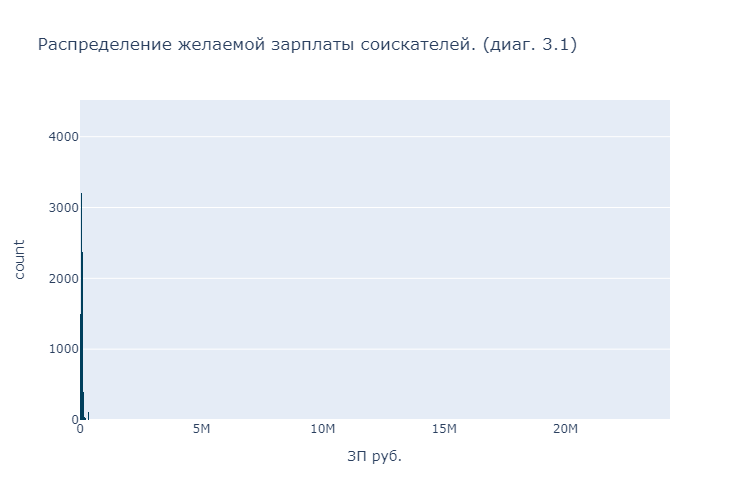

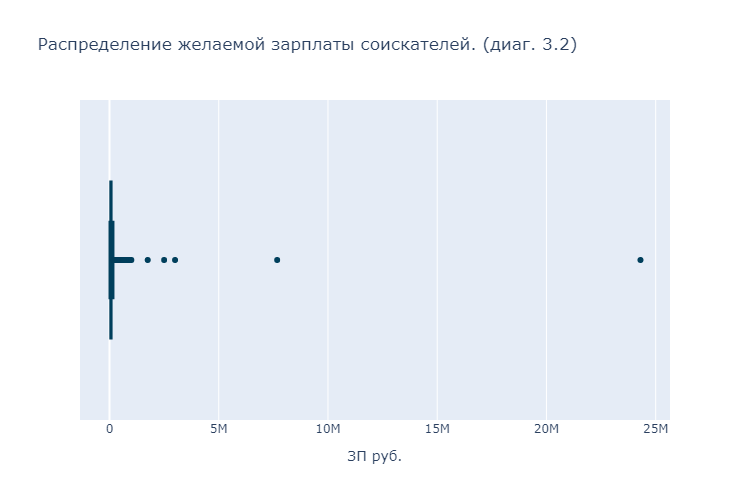

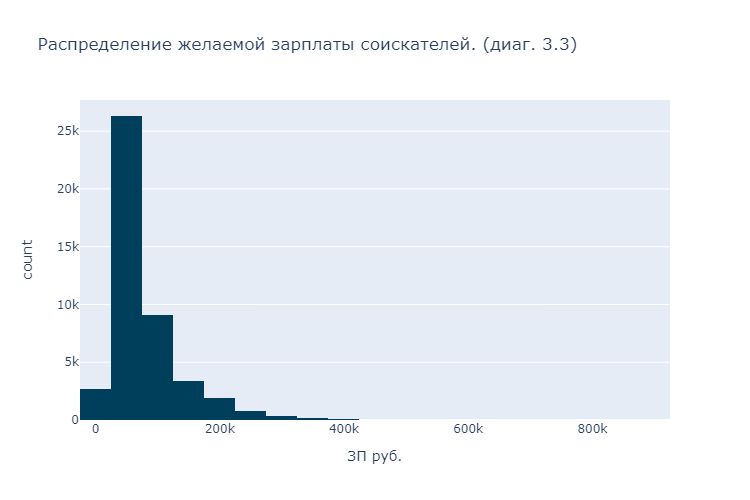

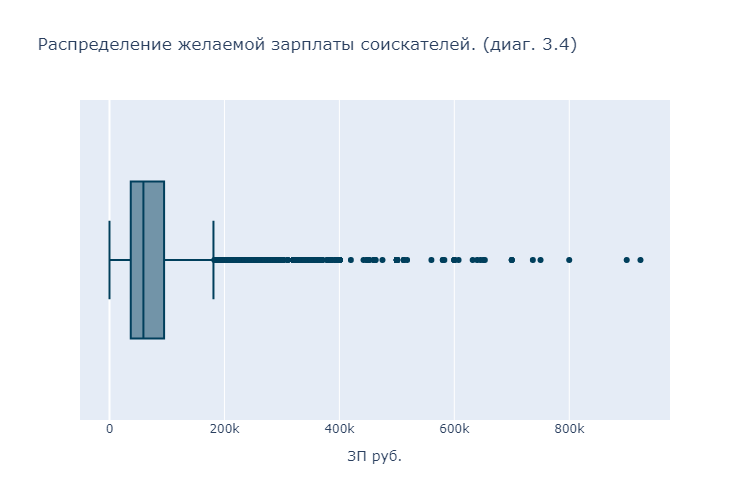

Максимальное значение признака 'ЗП руб.' равно 24304876.0 рублей. 
 Мода распределения равна 50000.0


In [16]:
# Строим гистограмму признака
hist = px.histogram(
    data_frame=df,
    x="ЗП руб.",
    width=750,
    height=500,
    # nbins=20,
    title="Распределение желаемой зарплаты соискателей. (диаг. 3.1)",
    color_discrete_sequence=[
        "#003f5c", 
        "#58508d", 
        "#bc5090", 
        "#ff6361", 
        "#ffa600"
        ],
)

# Строим коробчатую диаграмму признака
box = px.box(
    data_frame=df,
    x="ЗП руб.",
    width=750,
    height=500,
    title="Распределение желаемой зарплаты соискателей. (диаг. 3.2)",
    color_discrete_sequence=[
        "#003f5c", 
        "#58508d", 
        "#bc5090", 
        "#ff6361", 
        "#ffa600"
        ],
)

# Выводим графики
hist.show('png')
box.show('png')

# Построим дополнительные графики для резюме с ожидаемой зарплатой до 1 миллиона рублей
# чтобы получить более информативные диаграммы и ответить на вопросы задания.

hist1 = px.histogram(
    data_frame=df[df['ЗП руб.'] < 1000000],
    x="ЗП руб.",
    width=750,
    height=500,
    nbins=25,
    title="Распределение желаемой зарплаты соискателей. (диаг. 3.3)",
    color_discrete_sequence=[
        "#003f5c", 
        "#58508d", 
        "#bc5090", 
        "#ff6361", 
        "#ffa600"
        ],
)


# Строим коробчатую диаграмму признака
box1 = px.box(
    data_frame=df[df['ЗП руб.'] < 1000000],
    x="ЗП руб.",
    width=750,
    height=500,
    title="Распределение желаемой зарплаты соискателей. (диаг. 3.4)",
    color_discrete_sequence=[
        "#003f5c", 
        "#58508d", 
        "#bc5090", 
        "#ff6361", 
        "#ffa600"],
)

hist1.show('png')
box1.show('png')


# Ответ на вопрос 4.2
print(
    f"Максимальное значение признака 'ЗП руб.' равно {df['ЗП руб.'].max()} рублей.", '\n',
    f"Мода распределения равна {df['ЗП руб.'].mode()[0]}"
)


### Описание Графики [1](graphs/03_1.png), [2](graphs/03_2.png), [3](graphs/03_3.png), [4](graphs/03_4.png) 
* Диаграммы не читаемы из-за существенных выбросов.
* Модальное значение признака 'ЗП руб.' равно 50000 месяц.
* Из уточненных диаграмм видно, что большинство соискателей из представленного датафрейма желают иметь зарплату в примерном диапазоне от 25 до 125 тысяч рублей. Минимальная желаемая зарплата соискателя - 1 рубль. Максимальная желаемая зарплата соискателя составляет 24304876 рублей (!). Медианная желаемая зарплата составляет около 59 тысяч рублей, половина соискателей ожидают зарплату от 37 до 95 тысяч рублей.
* Значение желаемой зарплаты соискателя в 24 миллиона рублей явно является выбросом и принадлежит мужчине-программисту 1987 года рождения. Скорее всего им была неверно выбрана валюта при заполнении резюме (380 000 USD). Несколько схожих наблюдений также напоминают выбросы при ближайшем рассмотрении. Вообще если отсортировать в отдельной таблице соискателей с зарплатой выше 1 миллиона рублей то большинство из них напоминают однозначные выбросы.
* Распределение ассиметричное, близко к логнормальному.
* Требуется очистка данных для проведения более детального анализа.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

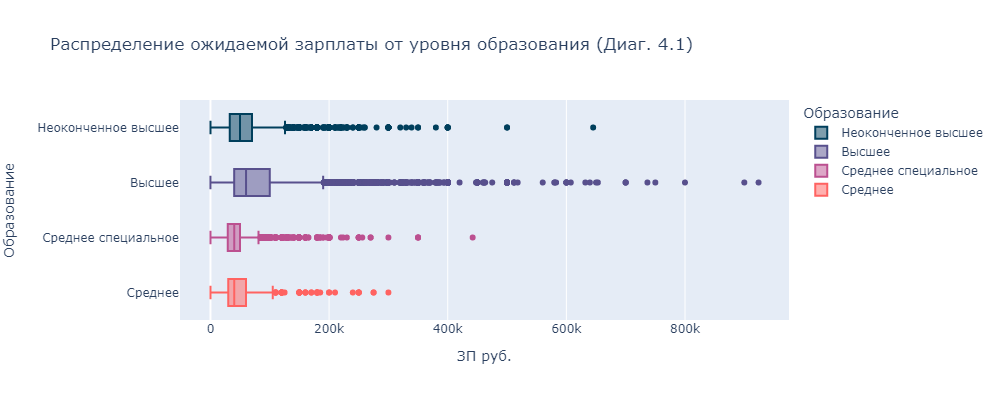

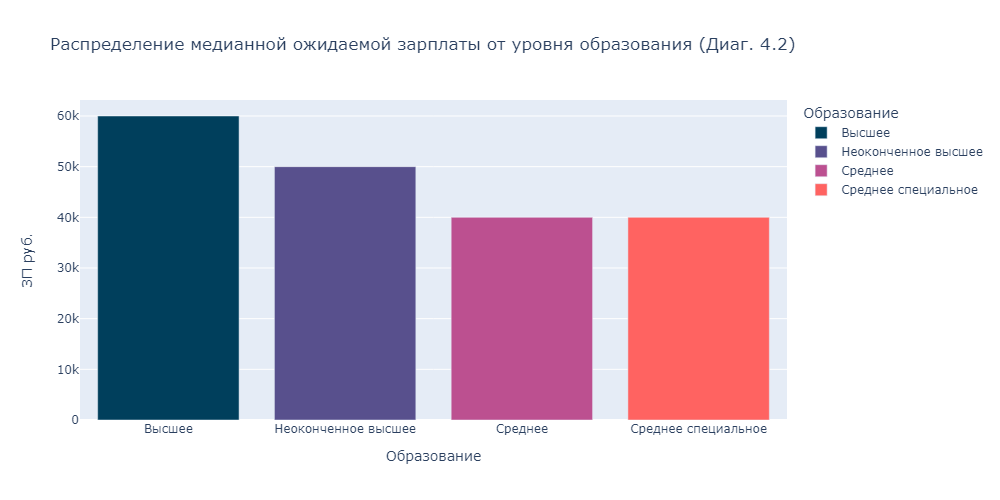

In [29]:
# Строим коробчатую диаграму на определенном срезе:
# 'ЗП руб.' ниже 1 млн. рублей.
box = px.box(
    data_frame=df[df["ЗП руб."] < 1000000],
    x="ЗП руб.",
    y="Образование",
    color="Образование",
    width=1000,
    height=400,
    title="Распределение ожидаемой зарплаты от уровня образования (Диаг. 4.1)",
    color_discrete_sequence=["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"],
)

# Строим столбчатую диаграмму распределения медианной заработной платы
# для большей наглядности
bar = px.bar(
    data_frame=df[df["ЗП руб."] < 1000000]
    .groupby("Образование", as_index=False)
    .median(numeric_only=True),
    y="ЗП руб.",
    x="Образование",
    color="Образование",
    width=1000,
    height=500,
    title="Распределение медианной ожидаемой зарплаты от уровня образования (Диаг. 4.2)",
    color_discrete_sequence=["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"],
)

box.show('png')
bar.show('png')


### Описание Графики [тут](graphs/04_1.png) и [тут](graphs/04_2.png)
Из представленных диаграмм наблюдается что:
* Самый высокий медианной уровень ожидаемой заработной платы наблюдается среди соискателей с высшим образованием (60 000 руб.).
* Самый низкий медианной уровень ожидаемой заработной платы наблюдается у соискателей со средним и средним специальным образованием (по 40 000 рублей)
* Признак образования безусловно важен для прогнозирования заработной платы. Чем выше образование - тем выше прогнозируемая заработная плата. Даже неоконченное высшее образование дает прибавку в 10 000 руб. к прогнозируемой заработной плате. Категории образования высшего и неоконченного высшего содержат в себе наиболее высокие значения заработной платы.
* В то же время категория Высшего образования имеет наибольший разброс среди всех остальных категорий. И нижняя граница распределения половины всех резюме (первый квартиль) равна медианному значению среди категорий среднего и среднего специального образования - 40 000 рублей.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

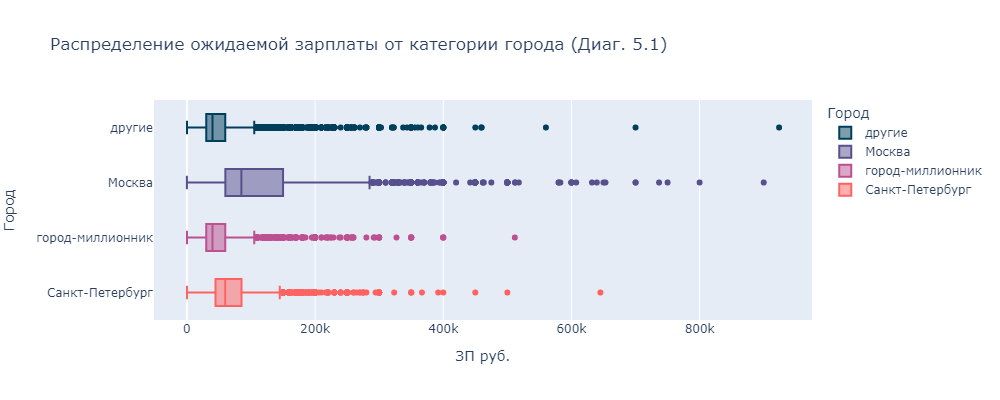

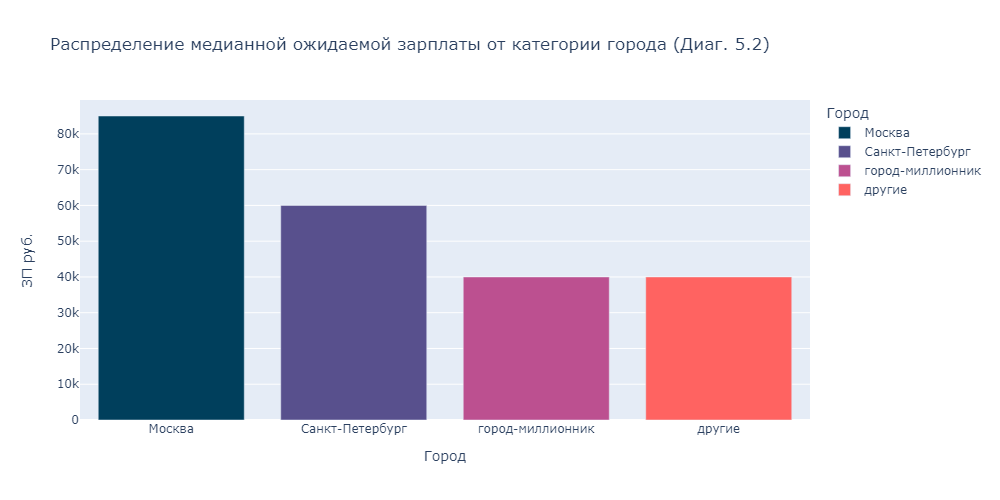

In [30]:
# Строим коробчатую диаграму признака на определенном срезе.
box = px.box(
    data_frame=df[df["ЗП руб."] < 1000000],
    x="ЗП руб.",
    y="Город",
    color="Город",
    width=1000,
    height=400,
    title="Распределение ожидаемой зарплаты от категории города (Диаг. 5.1)",
    color_discrete_sequence=["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"],
)

# Строим столбчатую диаграмму распределения медианны признака по категориям
# для большей наглядности.
bar = px.bar(
    data_frame=df[
        df["ЗП руб."] < 1000000
        ].groupby("Город", as_index=False).median(numeric_only=True),
    x="Город",
    y="ЗП руб.",
    color="Город",
    width=1000,
    height=500,
    title="Распределение медианной ожидаемой зарплаты от категории города (Диаг. 5.2)",
    color_discrete_sequence=["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"],
)

box.show('png')
bar.show('png')


### Описание Графики [тут](graphs/05_2.png) и [тут](graphs/05_1.png)
Из представленных диаграмм наблюдается что:
* Самый высокий уровень медианной ожидаемой заработной платы наблюдается среди соискателей из категории города 'Москва' (85 000 руб.), далее следует категория 'Санкт-Петербург' (60 000 руб.), категории 'город-миллионник' и 'другие' равны по медианной ожидаемой заработной плате - 40 000 рублей.
* Самый низкий медианный уровень ожидаемой заработной платы наблюдается у соискателей из городов-милионников и других (по 40 000 рублей).
* Признак города безусловно важен для прогнозирования заработной платы. Москва лидирует по данном показателю со значительным отрывом во всех уровнях. Половина соискателей из Москвы ожидает заработную плату в размере от 60 000 руб. до 150 000 руб. При этом соискатели из Санкт-Петербурга ожидают заработную плату от 44 000 рублей до 85 000 рублей.
* В то же время категория города 'Москва' имеет наибольший разброс среди всех остальных категорий. И нижняя граница распределения половины всех резюме (первый квартиль) равна медианному значению среди соискателей из Санкт-Петербурга - 60 000 рублей.
* При этом максимальный ожидаемый размер заработной платы из всех данных представленных в таблице наблюдается в категории города 'другие'.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

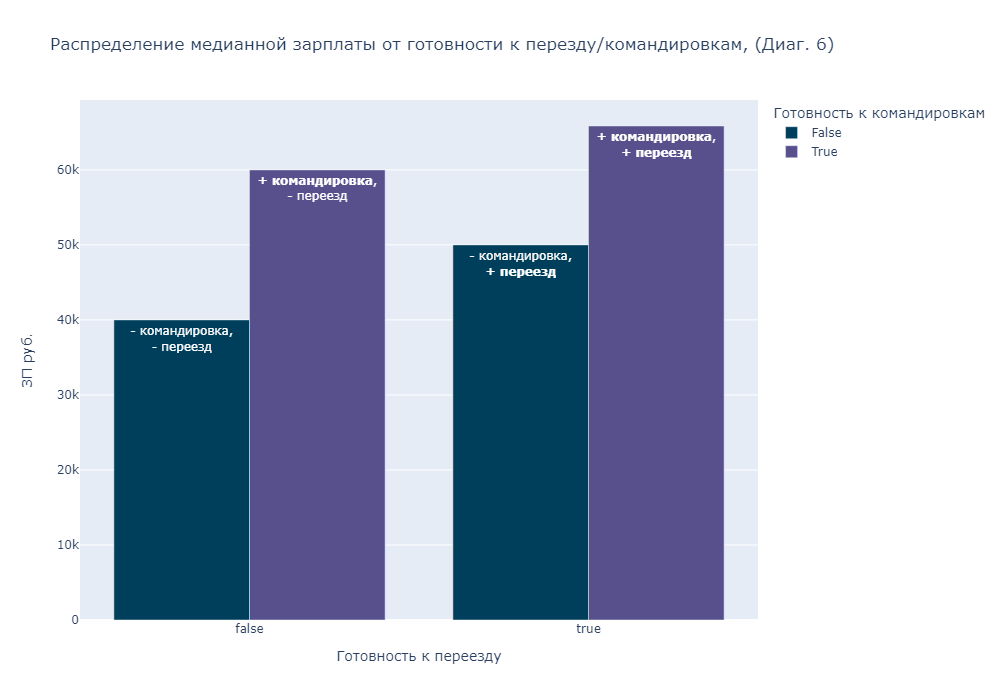

In [28]:
# Строим диаграмму в соответствии с задачей.
bar2 = px.bar(
    data_frame=df.groupby(
        ["Готовность к переезду", "Готовность к командировкам"], 
        as_index=False
    )
    .median(numeric_only=True)
    .iloc[:, [0, 1, -1]],
    x="Готовность к переезду",
    y="ЗП руб.",
    color="Готовность к командировкам",
    width=1000,
    height=700,
    title="Распределение медианной зарплаты от готовности к перезду/командировкам, (Диаг. 6)",
    color_discrete_sequence=["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"],
    barmode="group",
    text=[
        "- командировка,<br>- переезд",
        "<b>+ командировка</b>,<br>- переезд",
        "- командировка,<br><b>+ переезд</b>",
        "<b>+ командировка</b>,<br><b>+ переезд</b>",
    ],
)
bar2.show('png')


### Описание График [тут](graphs/06.png)
Из представленной диаграммы наблюдается что:
* Самый высокий уровень медианной ожидаемой заработной платы наблюдается среди соискателей соискателей которые готовы и к командировкам и к переезду (около 66 тыс. рублей), далее следует категория тех кто готов хотя бы к командировкам (60 тыс. рублей). 
* Наименьший показатель наблюдается среди категории соискателей которые не готовы ни к переезду ни к командировкам (40 тыс. рублей).
* Признак готовности к командировкам/переезду безусловно важен для прогнозирования заработной платы. Из распределения видно что соискатели готовые к командировкам и/или склонны ожидать более высокую заработную плату.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

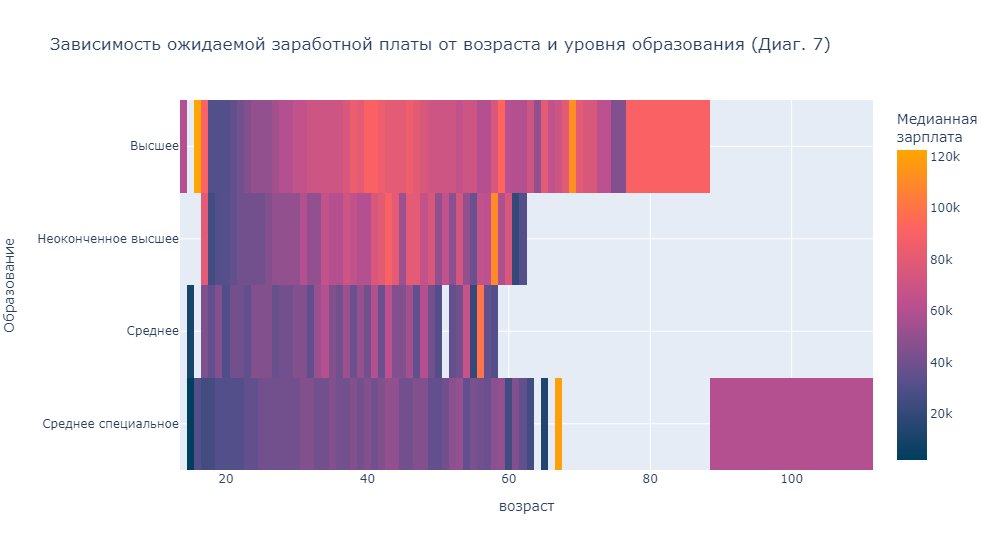

In [20]:
#  Создаем сводную таблицу для использования в качестве датафрейма диаграммы
pivot_df = pd.pivot_table(
    data=df, values="ЗП руб.", columns="Возраст", index="Образование", aggfunc="median"
)

# Строим диаграмму на основании сводной таблицы
htmap = px.imshow(
    pivot_df,
    width=1000,
    height=550,
    title="Зависимость ожидаемой заработной платы от возраста и уровня образования (Диаг. 7)",
    labels={"y": "Образование", "x": "возраст", "color": "Медианная<br>зарплата"},
    color_continuous_scale=["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"],
)
htmap.show('png')


### Описание График [тут](graphs/07.png)
Из представленной диаграммы наблюдается что:
* Полноценному анализу мешают явные выбросы, которые искажают диаграмму. Например соискатель с возрастом 100 лет с средним специальным образованием, соискатель с высшим образованием в возрасте 16 лет (также предполагаемый выброс) или соискатель в возрасте 77 лет с зарплатой 90 тысяч рублей.
* Наиболее высокие значения (более 120 тысяч рублей) в представленной диаграмме наблюдаются для категорий 16 лет и 69 лет с высшим образованием, 58 лет с неоконченным высшим(более 110 тысяч рублей), 56 лет со средним образованием (100 тысяч рублей), и 67 лет со средним специальным образованием (120 тысяч рублей). Заметно что это примерно середина распределения. То есть в рамках данных категорий образования наиболее высокую зарплату ожидают соискатели находящиеся в "расцвете трудовых сил".
* Наиболее низкие значения имеют категории соискателей в возрасте 15 лет со средним и средним специальном образовании (очевидно школьники, на подработку), а также 65 лет со средним специальным образованием, 55 лет со средним образованием, 60 лет с неоконченным высшим образованием.
* Равномерный "подогрев" карты заметен в районе категорий 38-48 лет с высшим образованием (около 90 тысяч рублей) и 41-46 лет с неоконченным высшим образованием (около 80-90 тысяч рублей.)
* В целом области среднего и среднего специального образования ожидаемо имеют меньший "прогрев", поскольку в целом значения медианной заработной платы для данной категории ниже.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

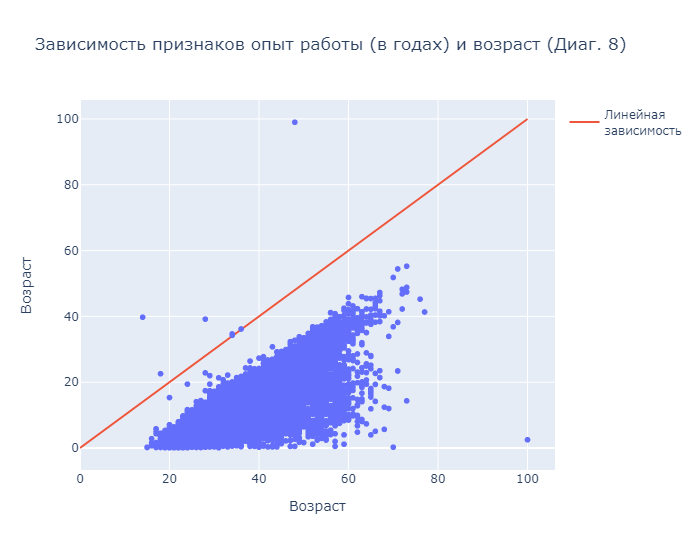

Количество выбросов, по критерию проработал/прожил:     7 
 Количество выбросов по критерию проработал/прожил после 14 лет:     73


In [21]:
# Строим диаграмму в соответствии с задачей
sctr = px.scatter(
    df,
    y=df["Опыт работы (месяц)"].apply(lambda x: x / 12),
    x="Возраст",
    width=700,
    height=550,
    title="Зависимость признаков опыт работы (в годах) и возраст (Диаг. 8)",
    labels={"y": "Возраст", "x": "Опыт работы (год)", "trace 1": "Линия 0"},
    color_continuous_scale=["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"],
)

# Добавляем диагональную линию
sctr.add_scatter(x=[0, 100], y=[0, 100], mode="lines", name="Линейная<br>зависимость")

# Выводим значения для ответа на вопрос
sctr.show('png')
print(
    f"Количество выбросов, по критерию проработал/прожил: \
    {df[df['Опыт работы (месяц)']/12 > df['Возраст']].shape[0]}",
    "\n",
    f"Количество выбросов по критерию проработал/прожил после 14 лет: \
    {df[df['Опыт работы (месяц)']/12 > df['Возраст'] - 14].shape[0]}",
)


### Описание График [тут](graphs/08.png)
Из представленной диаграммы наблюдается что:
* В представленных данных присутствуют данные выбросы по признаку 'Опыт работы' в количестве 7 штук. Возраст данных соискателей меньше или равен опыту работы.
* Также присутствуют несколько значений, в соответствии с которыми лица начали работать до 14 лет (например с пяти лет). 
* Данные соискатели также с высокой вероятностью являются выбросами, таких наблюдений 73  штуки.
* Также отчетливо заметны уже обнаруженные ранее выбросы - соискатель с опытом работы 99 лет и соискатель в возрасте 100 лет.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


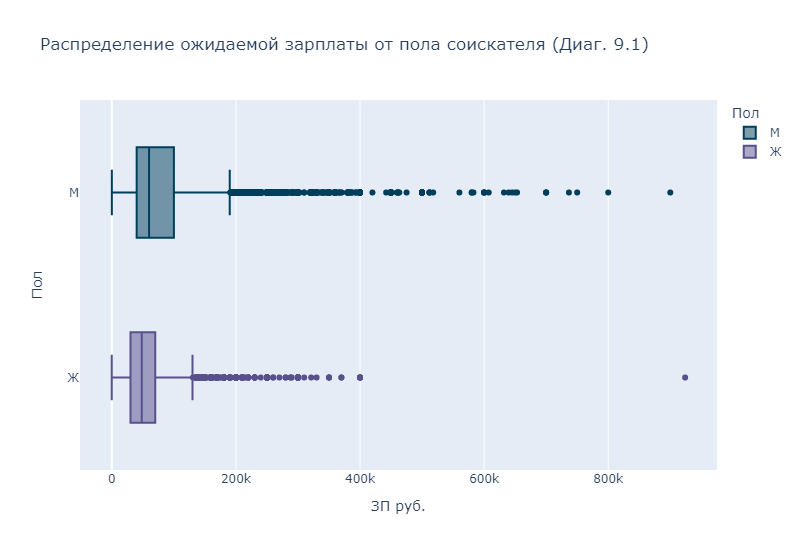

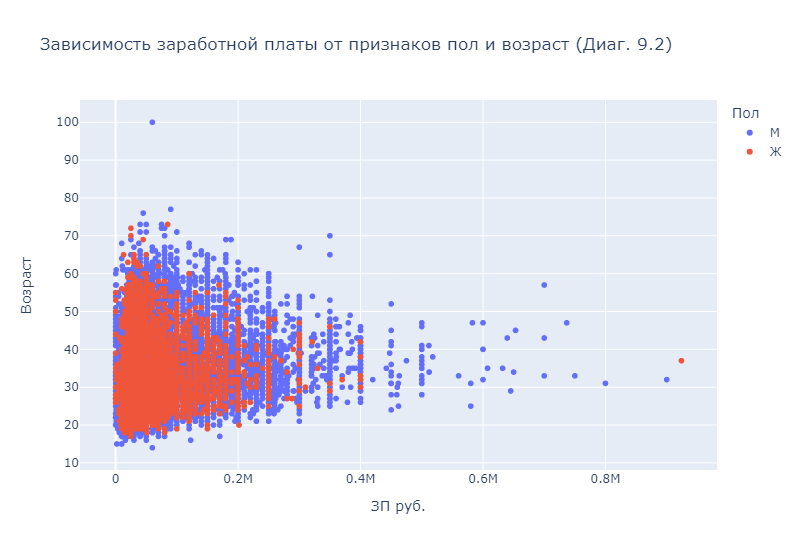

In [22]:
# Предлагаю построить диаграмму распределения медианной заработной платы в зависимости от пола соискателя
# Строим коробчатую диаграмму признака на определенном срезе до 1 млн рублей заработной платы.

box = px.box(
    data_frame=df[df["ЗП руб."] < 1000000],
    x="ЗП руб.",
    y="Пол",
    color="Пол",
    width=800,
    height=550,
    title="Распределение ожидаемой зарплаты от пола соискателя (Диаг. 9.1)",
    color_discrete_sequence=["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"],
)

# Диаграма рассеявания признаков пола возраста к размеру заработной платы.
sctr2 = px.scatter(
    df[df["ЗП руб."] < 1000000],
    x="ЗП руб.",
    y="Возраст",
    color="Пол",
    width=800,
    height=550,
    title="Зависимость заработной платы от признаков пол и возраст (Диаг. 9.2)",
    labels={"y": "Возраст", "x": "Опыт работы (год)", "trace 1": "Линия 0"},
    color_continuous_scale=["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"],
)


box.show('png')
sctr2.show('png')


### Описание. Графики [тут](graphs/09_1.png) и [тут](graphs/09_2.png)
Из представленных диаграмм наблюдается что:
* В целом мужчины, данные о которых содержатся в представленном датафрейме ожидают более высокую зарплату. Половина значений для данной категории лежит в диапазоне от 40 до 100 тыс. рублей, медианная заработная плата составляет 60 тыс рублей, максимальная заработная плата на данном срезе - 900 тыс. рублей.
* Половина соискателей женщин ожидают заработную плату в размере от 30 до 70 тыс. рублей, медианная заработная плата составляет 48 тыс рублей. Максимальное значение (с огромным отрывом) составляет 923 тыс. рублей.
* На второй диаграмме подтверждается ранее замеченная закономерность изменения заработной платы в зависимости от возраста, заметно, что заработная плата имеет явный тренд роста до примерно 35 лет, в дальнейшем зависимость возраста от заработной платы меняет направление и с увеличением возраста, размер ожидаемой заработной платы снижается.
* Данная зависимость справедлива как для мужчин так и женщин, данные по которым присутствуют в датасете.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# Создаем датафрейм дубликатов
mask = df.duplicated(subset=list(df.columns))
df_duplicates = df[mask]

# Находим количество дубликатов (ответ на вопрос 5.1)
print(f"Total dupes: {df_duplicates.shape[0]}")

# Удаляем дубликаты из датафрейма
df = df.drop_duplicates(subset=list(df.columns))
print(f"New length of DF: {df.shape[0]}")


Total dupes: 161
New length of DF: 44583


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
# Находим количество пропусков в столбцах (ответ на вопрос 5.2)
print(df["Опыт работы (месяц)"].isnull().value_counts())


# Общее количество столбцов с пропусками можно проверить
print(df.isna().any())

# Дейсвительно пропуски в трех столбцах:
#  «Опыт работы (месяц)», «Последнее/нынешнее место работы», «Последняя/нынешняя должность»


False    44415
True       168
Name: Опыт работы (месяц), dtype: int64
Ищет работу на должность:          False
Последнее/нынешнее место работы     True
Последняя/нынешняя должность        True
Обновление резюме                  False
Авто                               False
Образование                        False
Пол                                False
Возраст                            False
Опыт работы (месяц)                 True
Город                              False
Готовность к переезду              False
Готовность к командировкам         False
полная занятость                   False
частичная занятость                False
проектная работа                   False
волонтерство                       False
стажировка                         False
полный день                        False
сменный график                     False
гибкий график                      False
удалённая работа                   False
вахтовый метод                     False
ЗП руб.                     

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
# Отбрасываем строки в которых имеются пустые значения в столбцах:
# 'Последняя/нынешняя должность', 'Последнее/нынешнее место работы'

df = df.dropna(
    subset=["Последняя/нынешняя должность", "Последнее/нынешнее место работы"]
)

# Заполняем пропуски в столбце 'Опыт работы (месяц)' медианным значением
df = df.fillna(df.median(numeric_only=True))

# Проверяем заполнение пропусков:
print(df.isna().any())

# Ответ на вопрос 5.3
print(df["Опыт работы (месяц)"].mean().round())


Ищет работу на должность:          False
Последнее/нынешнее место работы    False
Последняя/нынешняя должность       False
Обновление резюме                  False
Авто                               False
Образование                        False
Пол                                False
Возраст                            False
Опыт работы (месяц)                False
Город                              False
Готовность к переезду              False
Готовность к командировкам         False
полная занятость                   False
частичная занятость                False
проектная работа                   False
волонтерство                       False
стажировка                         False
полный день                        False
сменный график                     False
гибкий график                      False
удалённая работа                   False
вахтовый метод                     False
ЗП руб.                            False
dtype: bool
114.0


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# Удаляем строки в которых заработная плата выше 1 млн рублей
# Определяем критерии сброса
index_salary = df[(df["ЗП руб."] < 1000) | (df["ЗП руб."] > 1000000)].index

# Ответ на вопрос 5.4.
print(len(index_salary))

# Удаляем строки по определенному критерию
df.drop(index_salary, inplace=True)


89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [ ]:
# Удаляем строки в которых заработная плата выше 1 млн рублей
# Определяем критерии сброса
index_age = df[df["Опыт работы (месяц)"] / 12 > df["Возраст"]].index

# Ответ на вопрос 5.5.
print(len(index_age))

# Удаляем строки по определенному критерию
df.drop(index_age, inplace=True)


7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Количество выбросов по методу трех сигм: 3,     минимальный возраст относящийся к выбросам: 15


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,ЗП руб.
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,Среднее,М,15,2.0,Санкт-Петербург,...,True,False,False,False,False,True,True,False,False,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,Среднее специальное,М,15,3.0,другие,...,False,False,False,False,True,False,False,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,False,True,True,False,True,False,False,60000.0


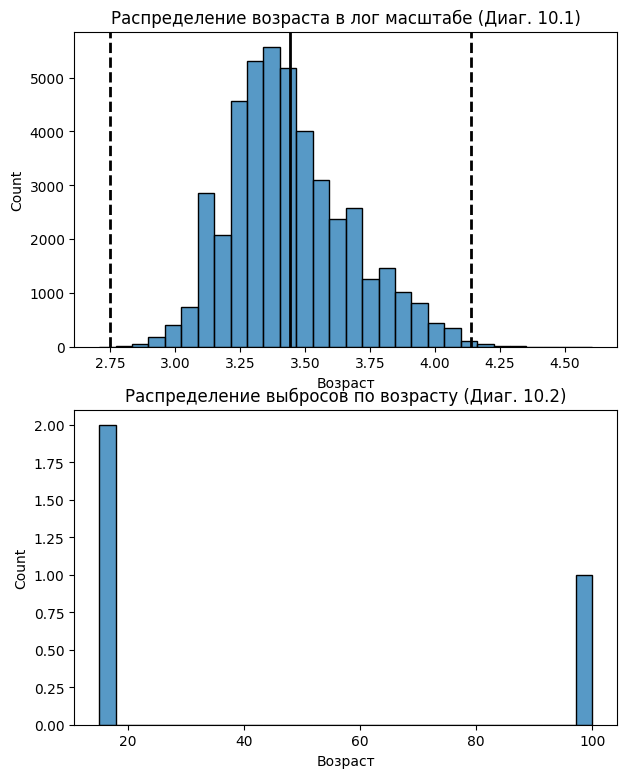

In [ ]:
# Строим график согласно поставленным условиям.
fig, ax = plt.subplots(2, 1, figsize=(7, 9))
age_hist = np.log(df["Возраст"])
histplot = sns.histplot(age_hist, bins=30, ax=ax[0])
histplot.axvline(age_hist.mean(), color="k", lw=2)
histplot.axvline(age_hist.mean() + 3 * age_hist.std(), color="k", ls="--", lw=2)
histplot.axvline(age_hist.mean() - 3 * age_hist.std(), color="k", ls="--", lw=2)
histplot.set_title("Распределение возраста в лог масштабе (Диаг. 10.1)")

# Ищем выбросы с использованием настраиваемого метода трех сигм.
# Определяем функцию
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned


# Формируем датасет с выбросами и очищенный от выбросов
outliers, cleaned_df = outliers_z_score(df, "Возраст", log_scale=True, right=4)

# Выводим количество выбросов и минимальный возраст подпадающий под выбросы
print(
    f"Количество выбросов по методу трех сигм: {outliers.shape[0]}, \
    минимальный возраст относящийся к выбросам: {outliers['Возраст'].min()}"
)

# Выводим таблицу выбросов
display(outliers)

# Строим диаграмму выбросов
histplot2 = sns.histplot(outliers["Возраст"], bins=30, ax=ax[1])
histplot2.set_title("Распределение выбросов по возрасту (Диаг. 10.2)")


### Описание
* Согласно полученной диаграммы 10.2 можно сделать вывод что распределение носит левосторонний характер (большая часть наблюдений лежит левее среднего значения).
* Большинство наблюдений укладывается в границы отсечения выбросов по методу трех сигм.
* Согласно проведенной очистке 3 соискателя в возрасте от 15, 15 и 100 лет подпадают под категорию выбросов. Что соответствует логике - такие наблюдения единичны и явно имеют характер аномалий. 14 лет минимальный возраст для начала трудовой деятельности, но на практике такие случаи достаточно редки. 100 лет напротив - единственное значение в датафрейме, люди в таком возрасте также крайне редко ищут работу.



In [ ]:
# Сохраняем полученный датасет в файл
cleaned_df.to_csv('data/Cleaned_data_HH.csv')
